模型准确率: 1.0000

分类报告:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20


混淆矩阵:
[[12  0]
 [ 0  8]]

模型已保存到: e:\八斗学院深度学习2025\八斗精品班\第二周_pytorch逻辑回归\第二周_pytorch逻辑回归\资料\iris_logistic_model.pkl


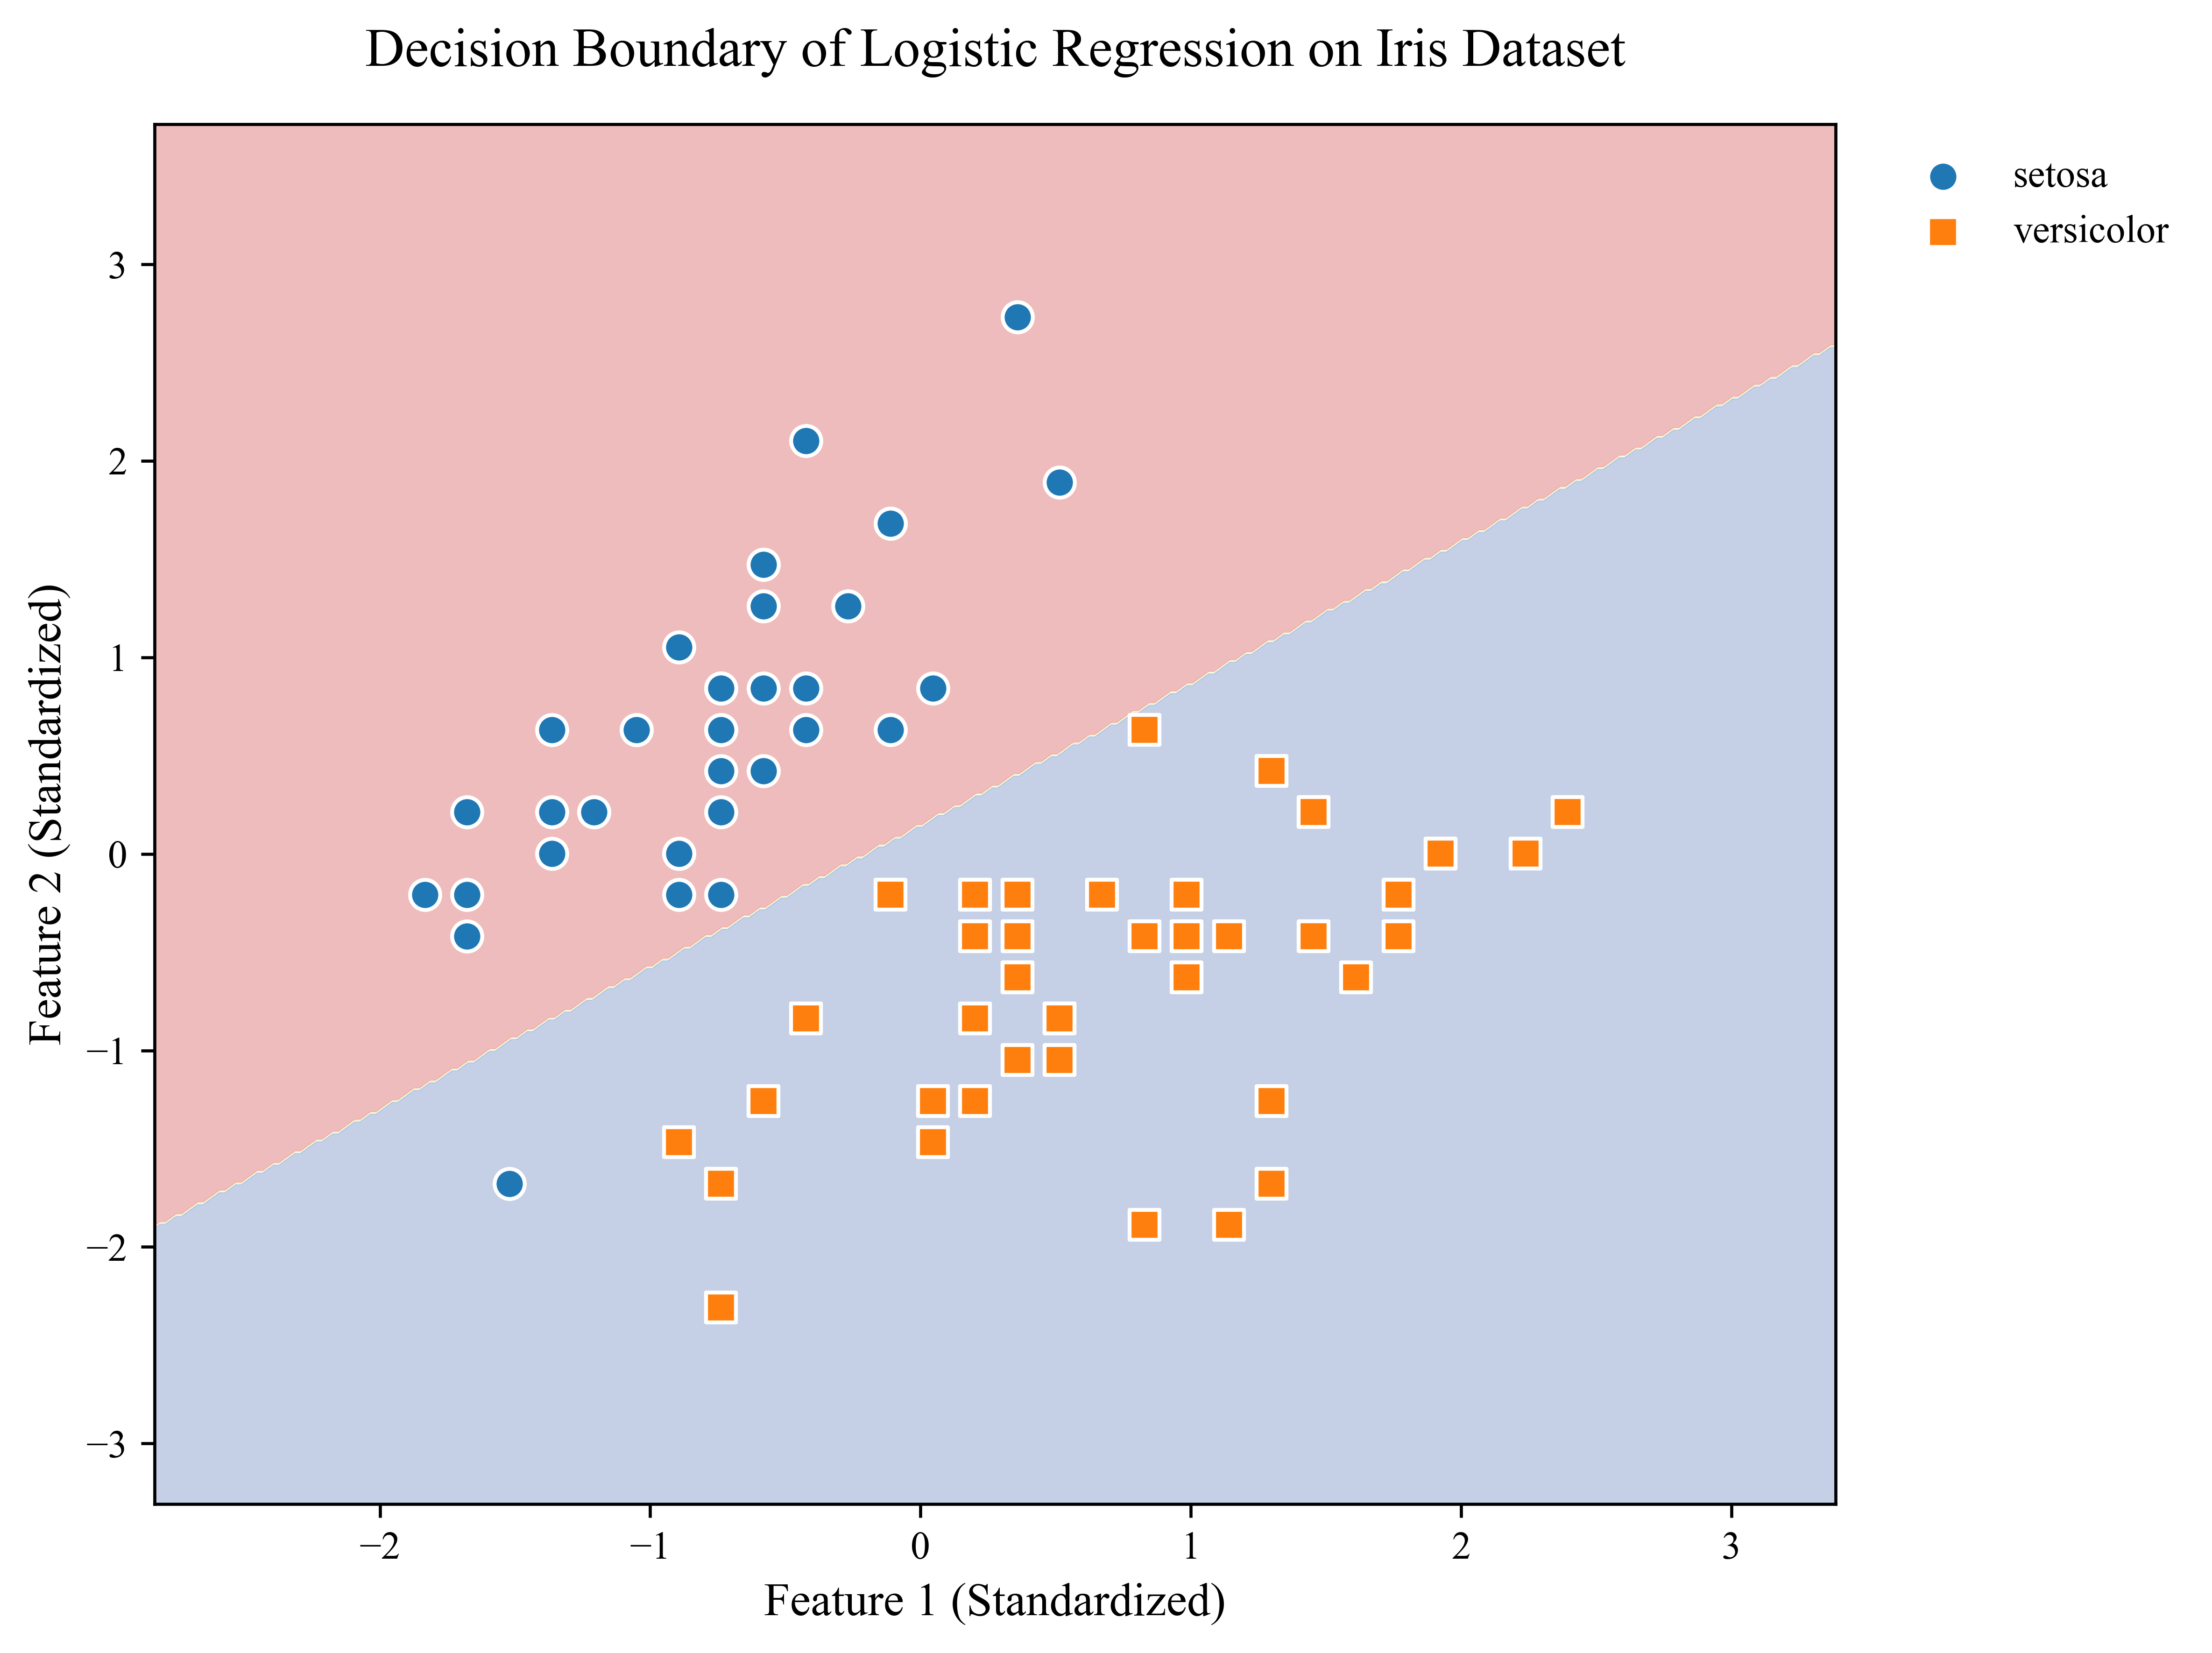


模型参数:
权重系数: [[ 0.79993072 -1.10796913  1.4608356   1.48301779]]
截距: [0.16204011]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

# 设置全局绘图样式
# plt.style.use('seaborn-darkgrid')
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10

# 1. 加载iris数据集
iris = load_iris()
X = iris.data
y = iris.target

# 为了简化逻辑回归问题（因为逻辑回归本身是二分类算法），我们只选择两个类别
# 这里选择前两个类别：setosa和versicolor
X = X[y < 2]
y = y[y < 2]

# 2. 数据预处理和划分
# 标准化特征
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 划分训练集和测试集（80%训练，20%测试）
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 3. 训练逻辑回归模型
# 创建逻辑回归模型实例，设置学习率相关参数
lr_model = LogisticRegression(C=1.0, solver='liblinear', max_iter=100)

# 训练模型
lr_model.fit(X_train, y_train)

# 4. 评估模型性能
# 在测试集上进行预测
y_pred = lr_model.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print(f"模型准确率: {accuracy:.4f}")

# 打印分类报告
print("\n分类报告:")
print(classification_report(y_test, y_pred, target_names=iris.target_names[:2]))

# 打印混淆矩阵
conf_matrix = confusion_matrix(y_test, y_pred)
print("\n混淆矩阵:")
print(conf_matrix)

# 5. 保存模型参数
model_filename = 'e:\\八斗学院深度学习2025\\八斗精品班\\第二周_pytorch逻辑回归\\第二周_pytorch逻辑回归\\资料\\iris_logistic_model.pkl'
joblib.dump((lr_model, scaler), model_filename)
print(f"\n模型已保存到: {model_filename}")

# 可视化决策边界
plt.figure(figsize=(8, 6), dpi=600)

# 创建网格以绘制决策边界
h = .02
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# 预测决策边界
Z = lr_model.predict(np.c_[xx.ravel(), yy.ravel(), np.zeros(xx.ravel().shape[0]), np.zeros(xx.ravel().shape[0])])
Z = Z.reshape(xx.shape)

# 绘制决策边界和散点图
plt.contourf(xx, yy, Z, alpha=0.3, cmap='RdYlBu')
scatter1 = plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], 
                      c='#1f77b4', marker='o', s=60, label=iris.target_names[0],
                      edgecolors='white', linewidth=1)
scatter2 = plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], 
                      c='#ff7f0e', marker='s', s=60, label=iris.target_names[1],
                      edgecolors='white', linewidth=1)

# 设置图表属性
plt.xlabel('Feature 1 (Standardized)', fontsize=12)
plt.ylabel('Feature 2 (Standardized)', fontsize=12)
plt.title('Decision Boundary of Logistic Regression on Iris Dataset', 
          fontsize=14, pad=15)

# 添加图例
legend = plt.legend(frameon=True, facecolor='white', framealpha=1, 
                   edgecolor='none', bbox_to_anchor=(1.02, 1), 
                   loc='upper left')

# 调整布局
plt.tight_layout()

plt.savefig('e:\\八斗学院深度学习2025\\八斗精品班\\第二周_pytorch逻辑回归\\第二周_pytorch逻辑回归\\资料\\iris_decision_boundary.png', 
            dpi=600, bbox_inches='tight')
plt.show()

# 打印模型参数
print("\n模型参数:")
print(f"权重系数: {lr_model.coef_}")
print(f"截距: {lr_model.intercept_}")

In [ ]:
import numpy as np
import joblib
from sklearn.datasets import load_iris

# 加载保存的模型和标准化器
model_filename = 'e:\\八斗学院深度学习2025\\八斗精品班\\第二周_pytorch逻辑回归\\第二周_pytorch逻辑回归\\资料\\iris_logistic_model.pkl'
lr_model, scaler = joblib.load(model_filename)

# 加载iris数据集以获取类别名称
iris = load_iris()
class_names = iris.target_names[:2]  # 只使用前两个类别

# 定义预测函数
def predict_iris(sepal_length, sepal_width, petal_length, petal_width):
    # 创建特征数组
    features = np.array([[sepal_length, sepal_width, petal_length, petal_width]])
    
    # 标准化特征
    features_scaled = scaler.transform(features)
    
    # 进行预测
    prediction = lr_model.predict(features_scaled)
    probability = lr_model.predict_proba(features_scaled)
    
    # 获取预测的类别名称
    predicted_class = class_names[prediction[0]]
    
    return {
        'predicted_class': predicted_class,
        'prediction': int(prediction[0]),
        'probability': probability[0].tolist()
    }

test_samples = [
    [5.1, 3.5, 1.4, 0.2],  # 可能是setosa
    [7.0, 3.2, 4.7, 1.4]   # 可能是versicolor
]

print("预测示例:")
for i, sample in enumerate(test_samples):
    result = predict_iris(*sample)
    print(f"\n样本 {i+1}: {sample}")
    print(f"预测类别: {result['predicted_class']} (类别 {result['prediction']})")
    print(f"预测概率: {[round(p, 4) for p in result['probability']]}")

预测示例:

样本 1: [5.1, 3.5, 1.4, 0.2]
预测类别: setosa (类别 0)
预测概率: [0.9861, 0.0139]

样本 2: [7.0, 3.2, 4.7, 1.4]
预测类别: versicolor (类别 1)
预测概率: [0.0048, 0.9952]


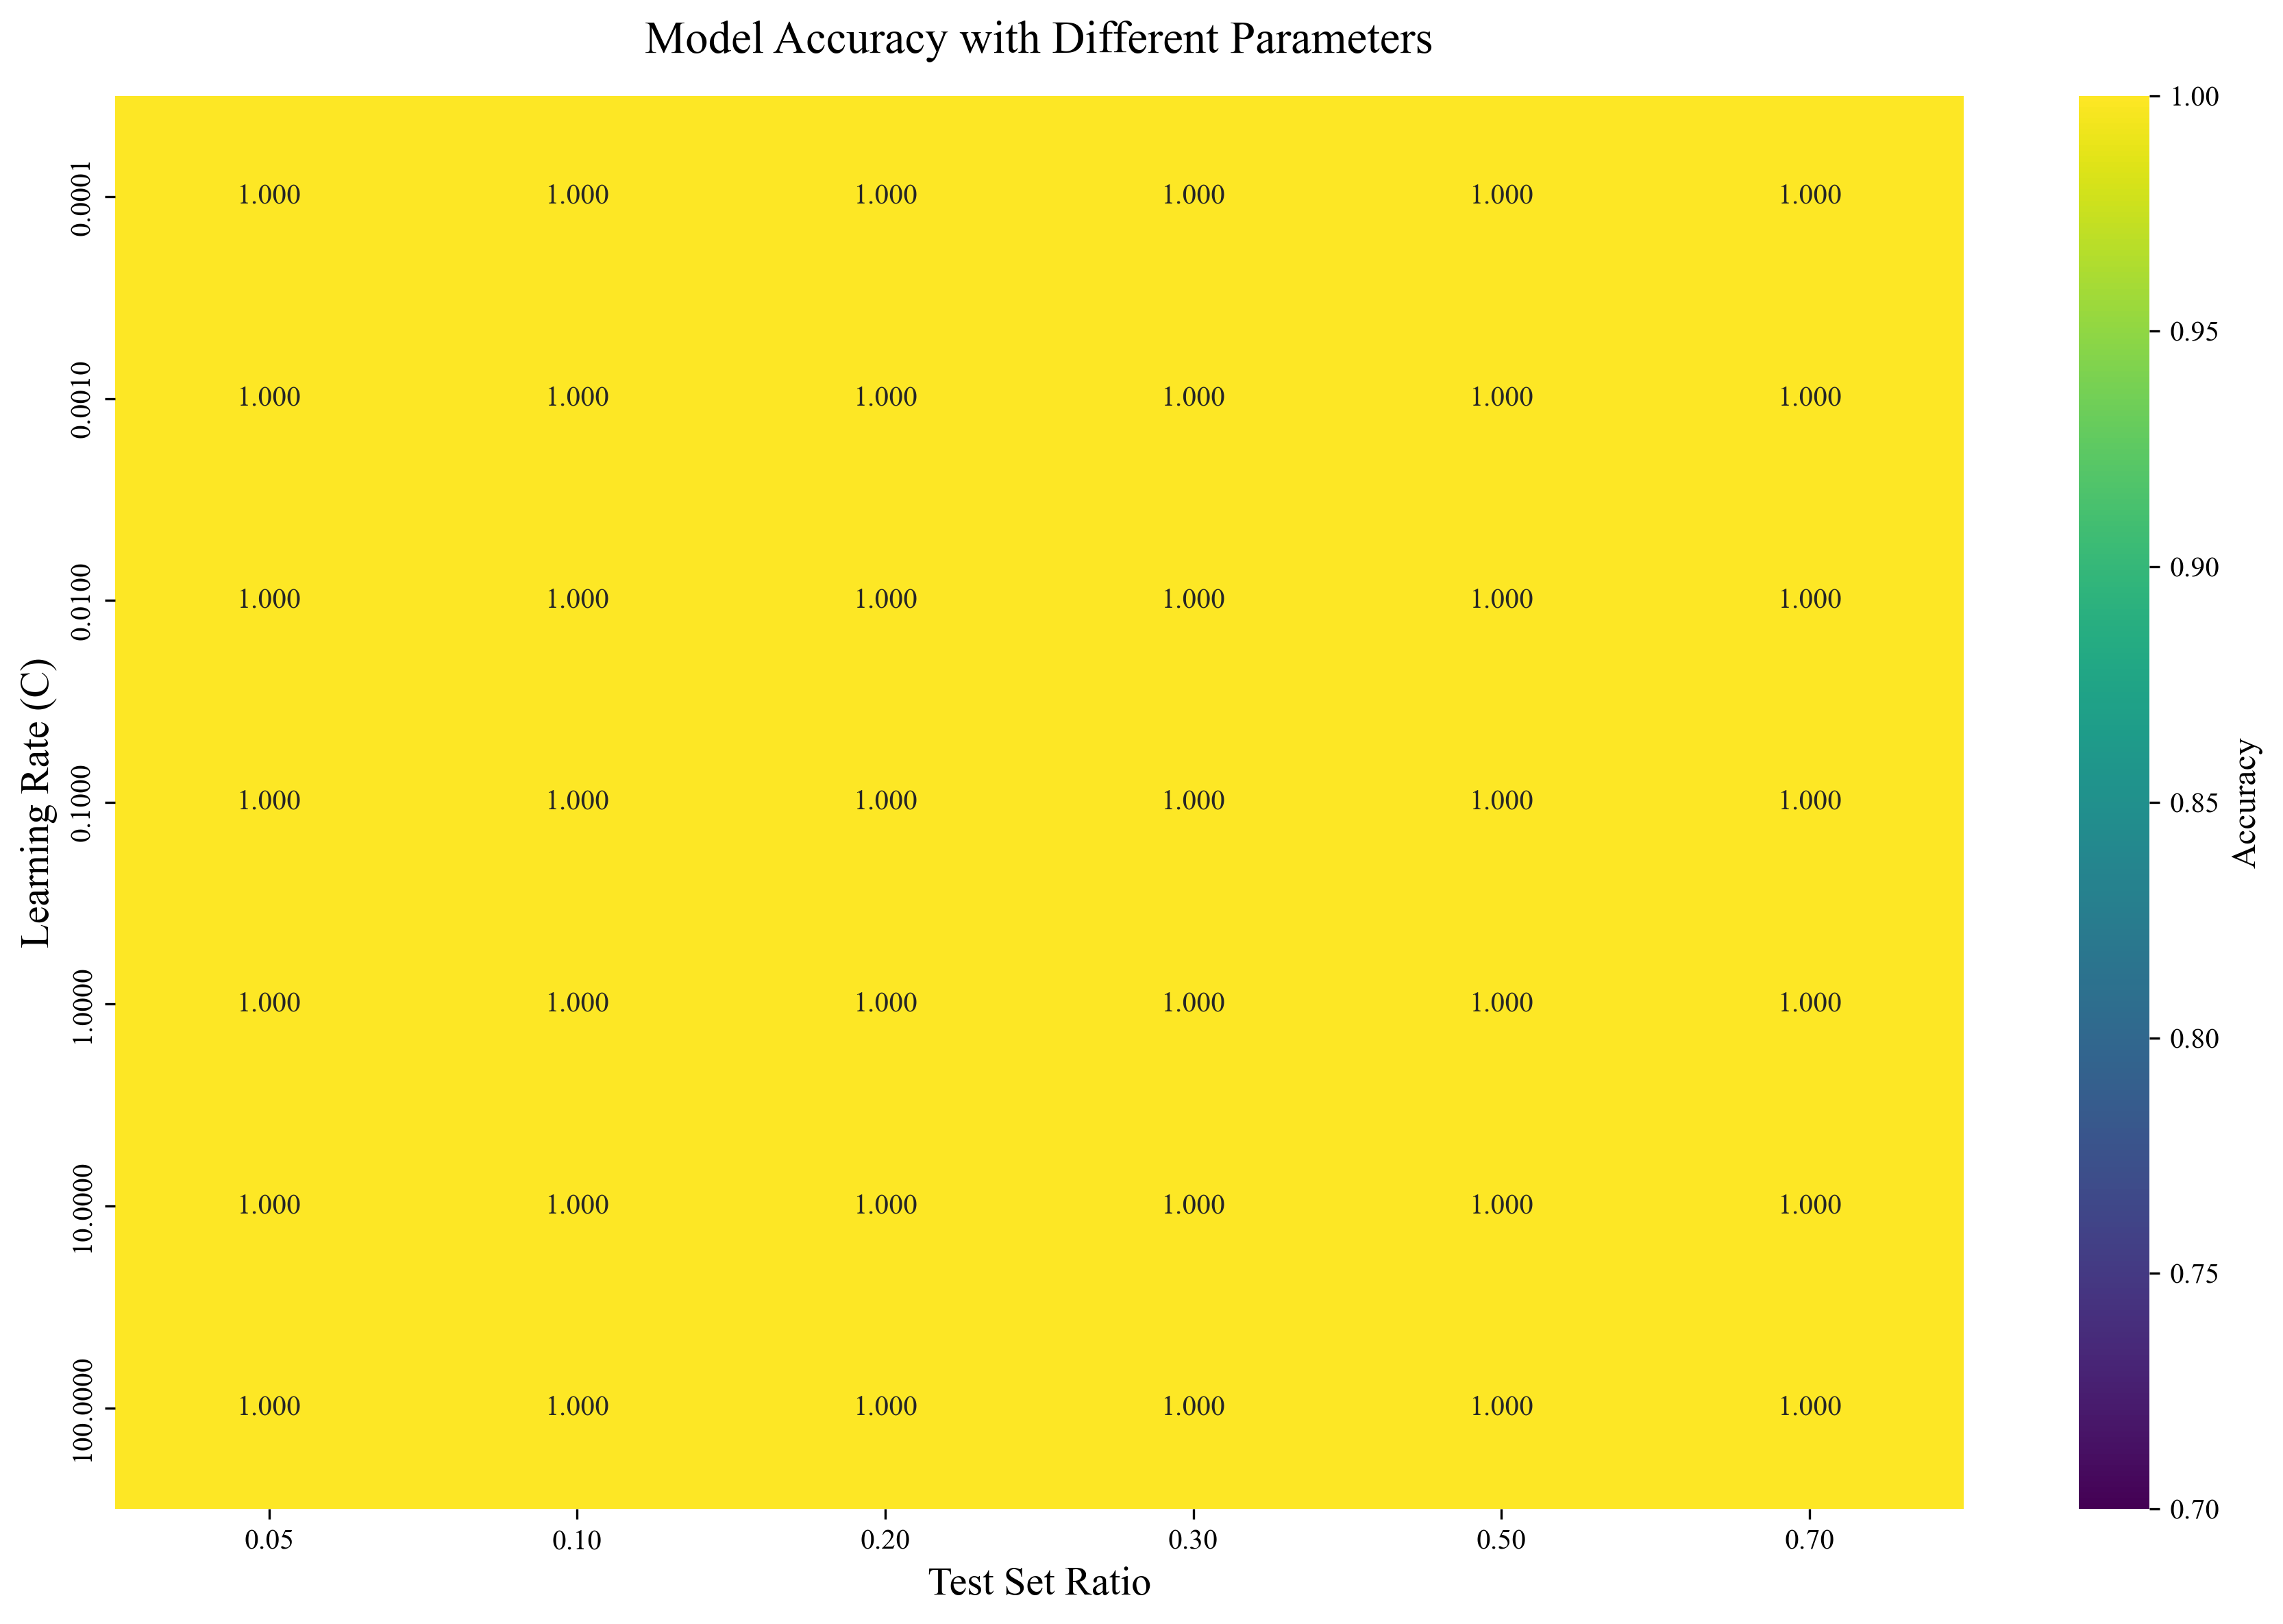

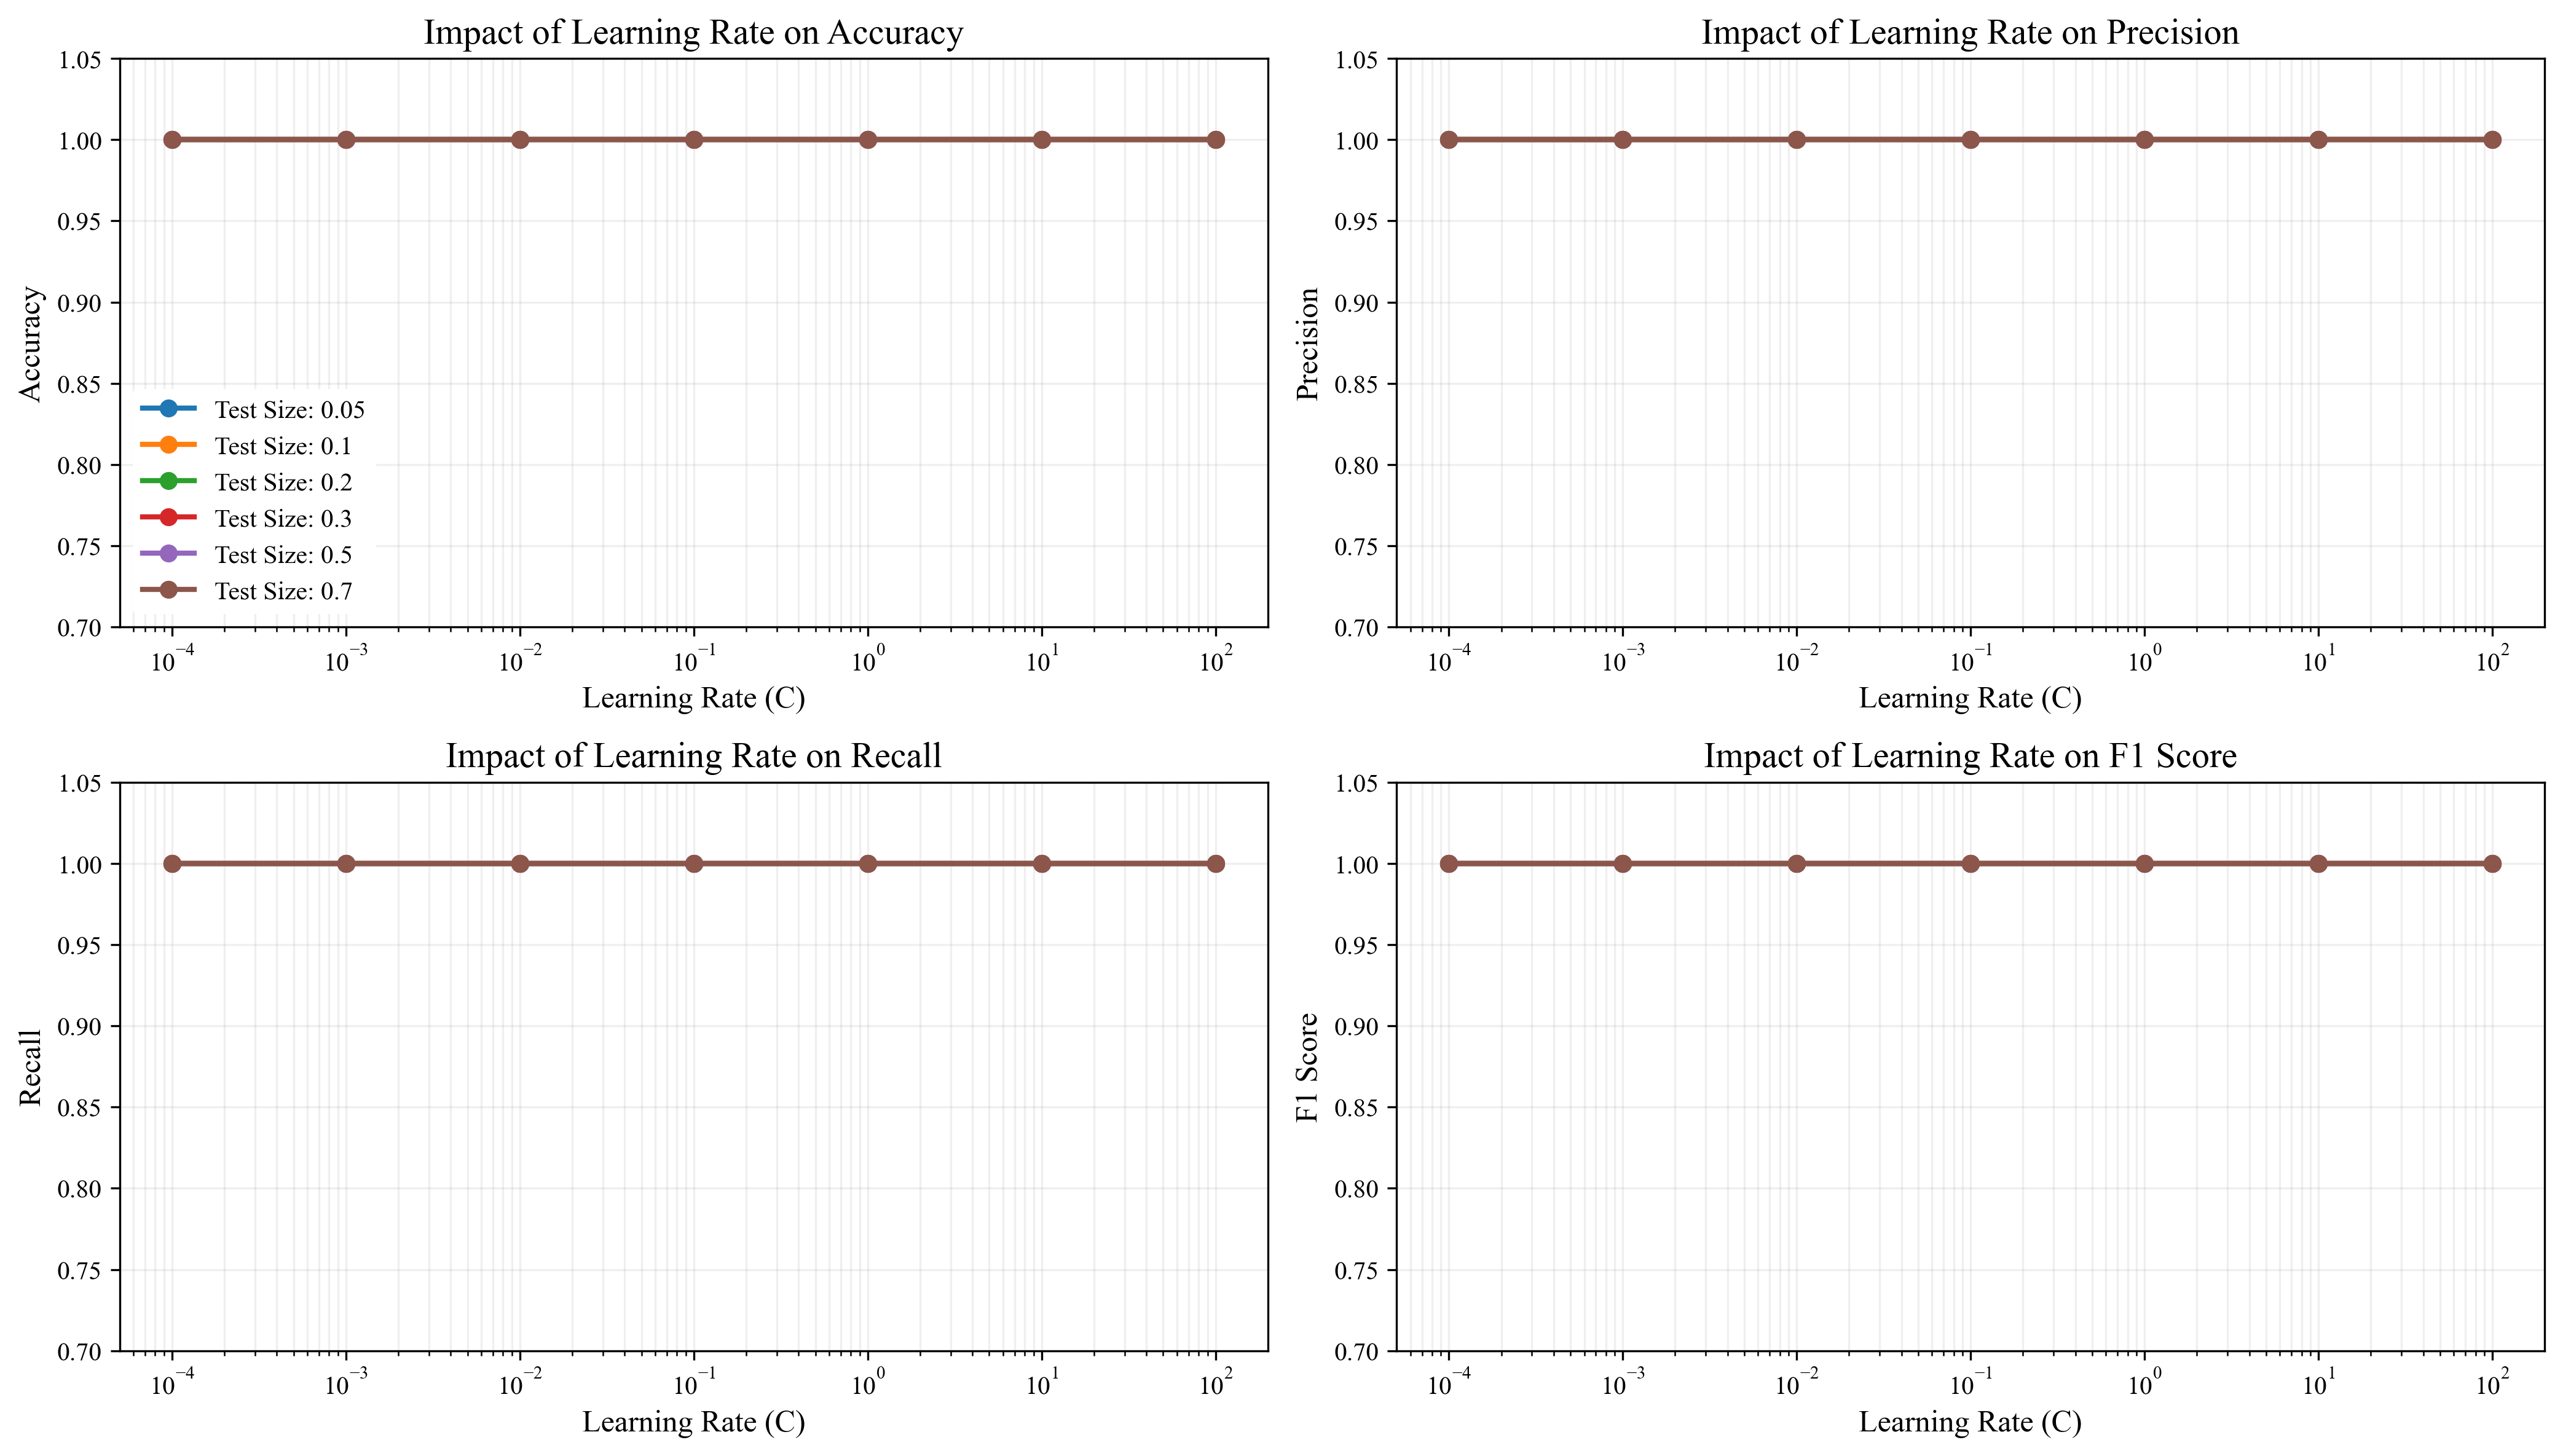

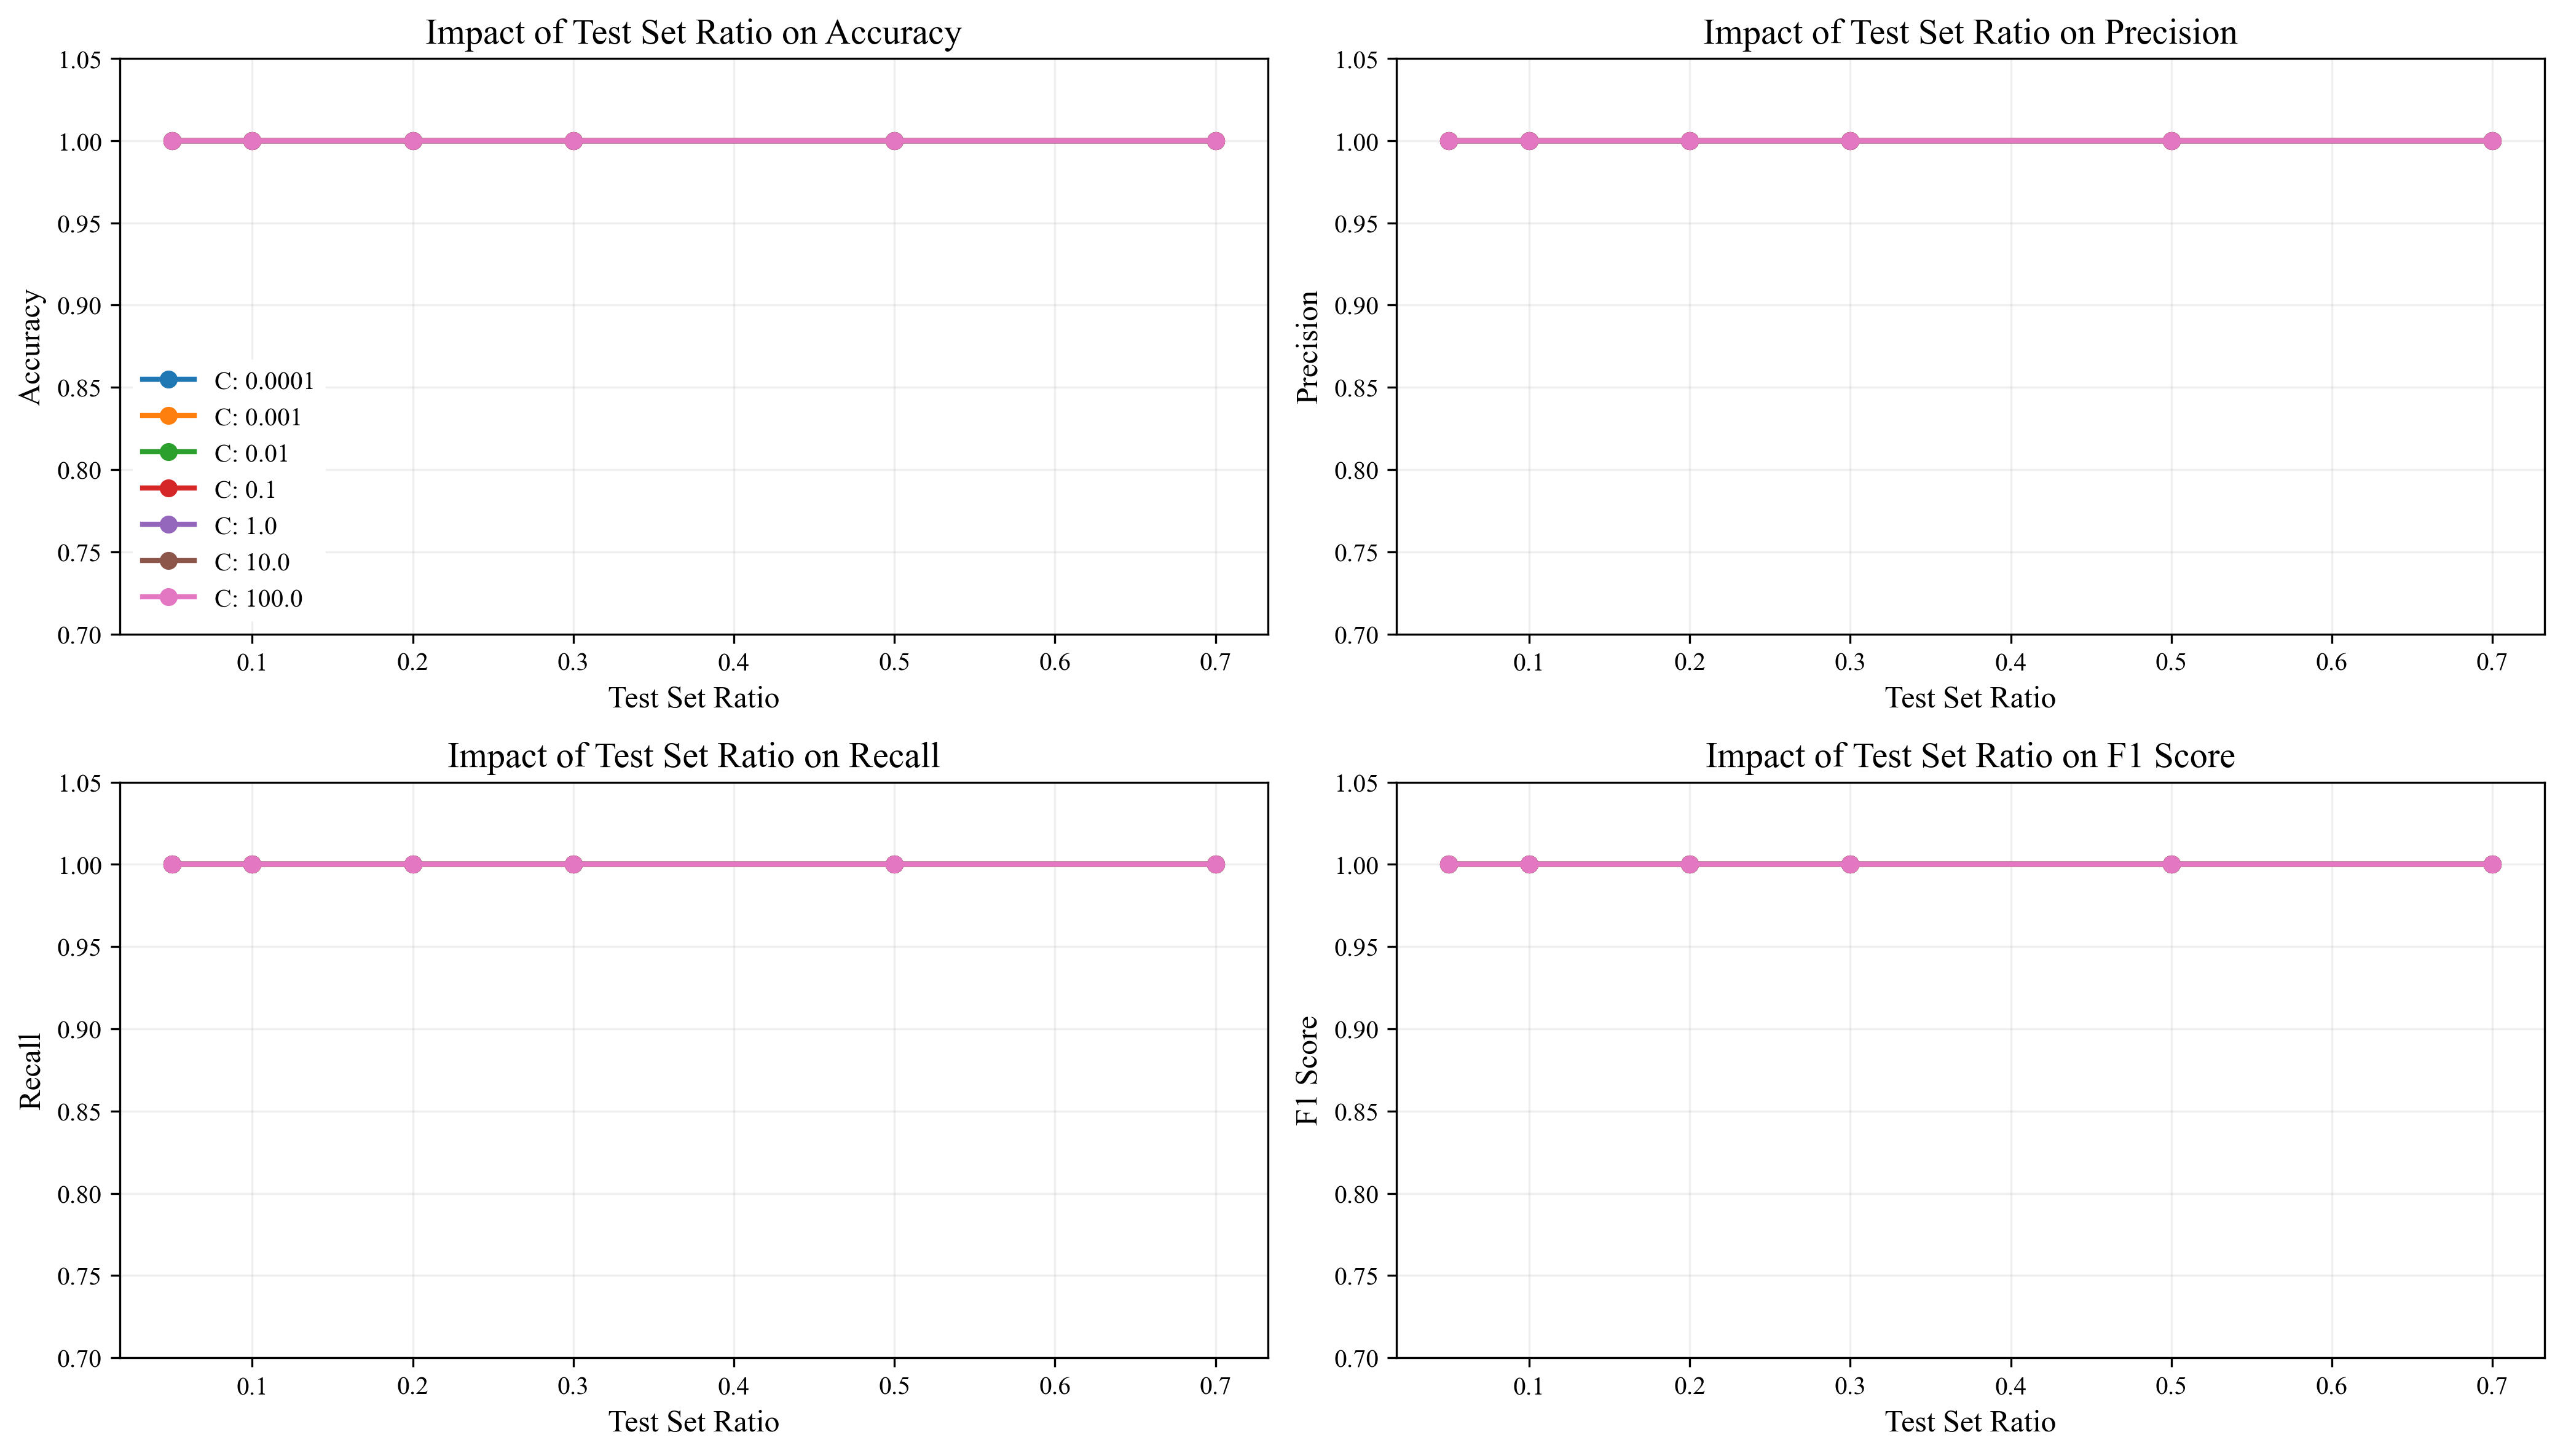


Best Parameter Combination:
Learning Rate (C): 0.0001
Test Size: 0.05
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

# 设置全局绘图样式
# plt.style.use('seaborn-darkgrid')
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10

# 加载数据
iris = load_iris()
X = iris.data
y = iris.target
X = X[y < 2]
y = y[y < 2]

# 标准化特征
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 定义要测试的参数
learning_rates = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
split_ratios = [0.05, 0.1, 0.2, 0.3, 0.5, 0.7]

# 存储结果
results = []

# 训练和评估不同参数组合
for C in learning_rates:
    for test_size in split_ratios:
        # 划分数据
        X_train, X_test, y_train, y_test = train_test_split(
            X_scaled, y, test_size=test_size, random_state=42
        )
        
        # 训练模型
        model = LogisticRegression(C=C, solver='liblinear', max_iter=1000)
        model.fit(X_train, y_train)
        
        # 预测和评估
        y_pred = model.predict(X_test)
        
        # 计算各种指标
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        
        results.append({
            'Learning Rate': C,
            'Test Size': test_size,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1
        })

# 创建热力图数据
accuracy_matrix = np.zeros((len(learning_rates), len(split_ratios)))
for i, C in enumerate(learning_rates):
    for j, test_size in enumerate(split_ratios):
        result = next(r for r in results 
                     if r['Learning Rate'] == C and r['Test Size'] == test_size)
        accuracy_matrix[i, j] = result['Accuracy']

# 绘制热力图
plt.figure(figsize=(12, 8), dpi=300)
sns.heatmap(accuracy_matrix, 
            xticklabels=[f'{x:.2f}' for x in split_ratios],
            yticklabels=[f'{x:.4f}' for x in learning_rates],
            annot=True, 
            fmt='.3f',
            cmap='viridis',  # 更改颜色映射以增强对比度
            vmin=0.7, vmax=1.0,  # 设置颜色范围以增强差异
            cbar_kws={'label': 'Accuracy'})

plt.xlabel('Test Set Ratio', fontsize=14)
plt.ylabel('Learning Rate (C)', fontsize=14)
plt.title('Model Accuracy with Different Parameters', fontsize=16, pad=15)

plt.tight_layout()
plt.savefig('e:\\八斗学院深度学习2025\\八斗精品班\\第二周_pytorch逻辑回归\\第二周_pytorch逻辑回归\\资料\\parameter_comparison_heatmap.png',
            dpi=300, bbox_inches='tight')
plt.show()

# 绘制学习率对不同指标的影响
plt.figure(figsize=(14, 8), dpi=300)
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

for metric, color in zip(metrics, colors):
    plt.subplot(2, 2, metrics.index(metric) + 1)
    
    for test_size in split_ratios:
        scores = [r[metric] for r in results if r['Test Size'] == test_size]
        lr_values = [r['Learning Rate'] for r in results if r['Test Size'] == test_size]
        
        # 确保数据按学习率排序
        sorted_indices = np.argsort(lr_values)
        lr_values = [lr_values[i] for i in sorted_indices]
        scores = [scores[i] for i in sorted_indices]
        
        plt.plot(lr_values, scores, 'o-', 
                 label=f'Test Size: {test_size}', 
                 linewidth=2, markersize=6)
    
    plt.xscale('log')
    plt.grid(True, which="both", ls="-", alpha=0.2)
    plt.xlabel('Learning Rate (C)', fontsize=12)
    plt.ylabel(metric, fontsize=12)
    plt.title(f'Impact of Learning Rate on {metric}', fontsize=14)
    plt.ylim(0.7, 1.05)  # 设置y轴范围以增强差异
    if metric == 'Accuracy':
        plt.legend(frameon=True, facecolor='white', framealpha=1, edgecolor='none')

plt.tight_layout()
plt.savefig('e:\\八斗学院深度学习2025\\八斗精品班\\第二周_pytorch逻辑回归\\第二周_pytorch逻辑回归\\资料\\learning_rate_comparison_detailed.png',
            dpi=300, bbox_inches='tight')
plt.show()

# 添加新的可视化：测试集比例对性能的影响
plt.figure(figsize=(14, 8), dpi=300)

for metric, color in zip(metrics, colors):
    plt.subplot(2, 2, metrics.index(metric) + 1)
    
    for C in learning_rates:
        scores = [r[metric] for r in results if r['Learning Rate'] == C]
        test_sizes = [r['Test Size'] for r in results if r['Learning Rate'] == C]
        
        # 确保数据按测试集比例排序
        sorted_indices = np.argsort(test_sizes)
        test_sizes = [test_sizes[i] for i in sorted_indices]
        scores = [scores[i] for i in sorted_indices]
        
        plt.plot(test_sizes, scores, 'o-', 
                 label=f'C: {C}', 
                 linewidth=2, markersize=6)
    
    plt.grid(True, which="both", ls="-", alpha=0.2)
    plt.xlabel('Test Set Ratio', fontsize=12)
    plt.ylabel(metric, fontsize=12)
    plt.title(f'Impact of Test Set Ratio on {metric}', fontsize=14)
    plt.ylim(0.7, 1.05)  # 设置y轴范围以增强差异
    if metric == 'Accuracy':
        plt.legend(frameon=True, facecolor='white', framealpha=1, edgecolor='none')

plt.tight_layout()
plt.savefig('e:\\八斗学院深度学习2025\\八斗精品班\\第二周_pytorch逻辑回归\\第二周_pytorch逻辑回归\\资料\\test_size_comparison.png',
            dpi=300, bbox_inches='tight')
plt.show()

# 打印最佳参数组合
best_result = max(results, key=lambda x: x['Accuracy'])
print("\nBest Parameter Combination:")
print(f"Learning Rate (C): {best_result['Learning Rate']}")
print(f"Test Size: {best_result['Test Size']}")
print(f"Accuracy: {best_result['Accuracy']:.4f}")
print(f"Precision: {best_result['Precision']:.4f}")
print(f"Recall: {best_result['Recall']:.4f}")
print(f"F1 Score: {best_result['F1 Score']:.4f}")

c:\Users\jshmx\anaconda3\envs\dlenv\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\jshmx\anaconda3\envs\dlenv\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\jshmx\anaconda3\envs\dlenv\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\jshmx\anaconda3\envs\dlenv\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\jshmx\anaconda3\envs\dlenv\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\jshmx\anaconda3\envs\dlenv\Lib\site-packages\sklearn\svm\_base.py:1235: Conv

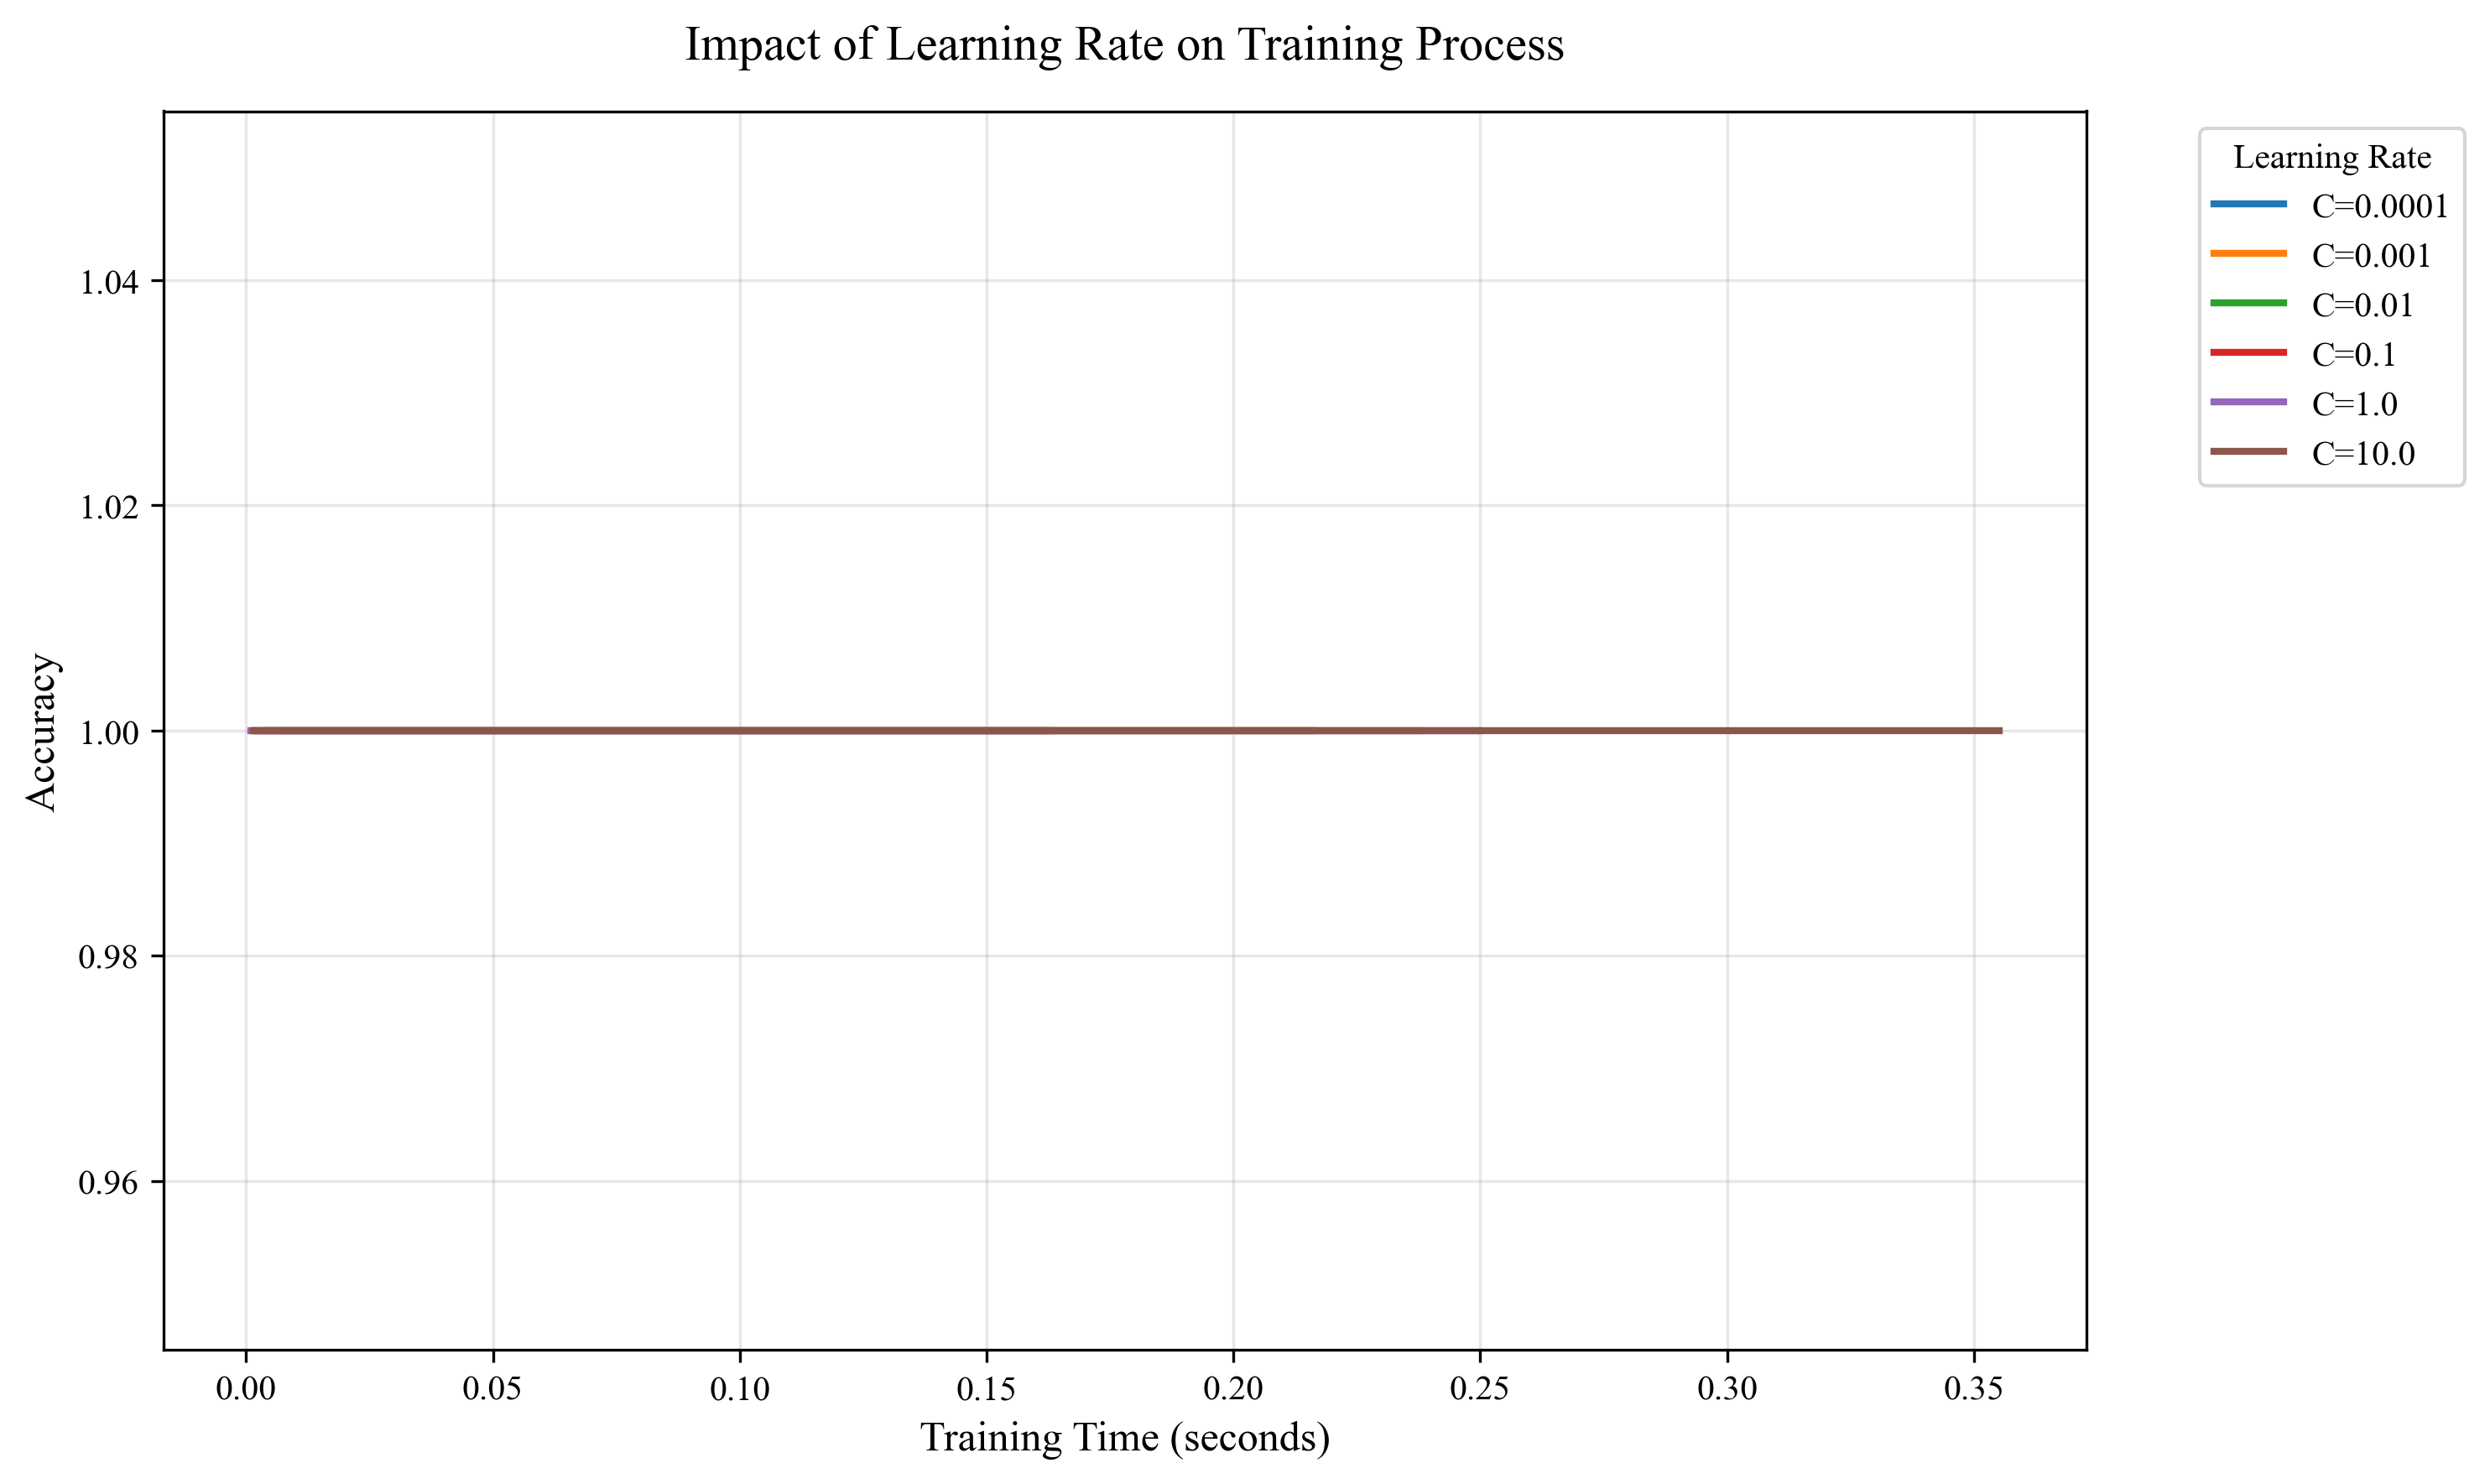

c:\Users\jshmx\anaconda3\envs\dlenv\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\jshmx\anaconda3\envs\dlenv\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\jshmx\anaconda3\envs\dlenv\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\jshmx\anaconda3\envs\dlenv\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\jshmx\anaconda3\envs\dlenv\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\jshmx\anaconda3\envs\dlenv\Lib\site-packages\sklearn\svm\_base.py:1235: Conv

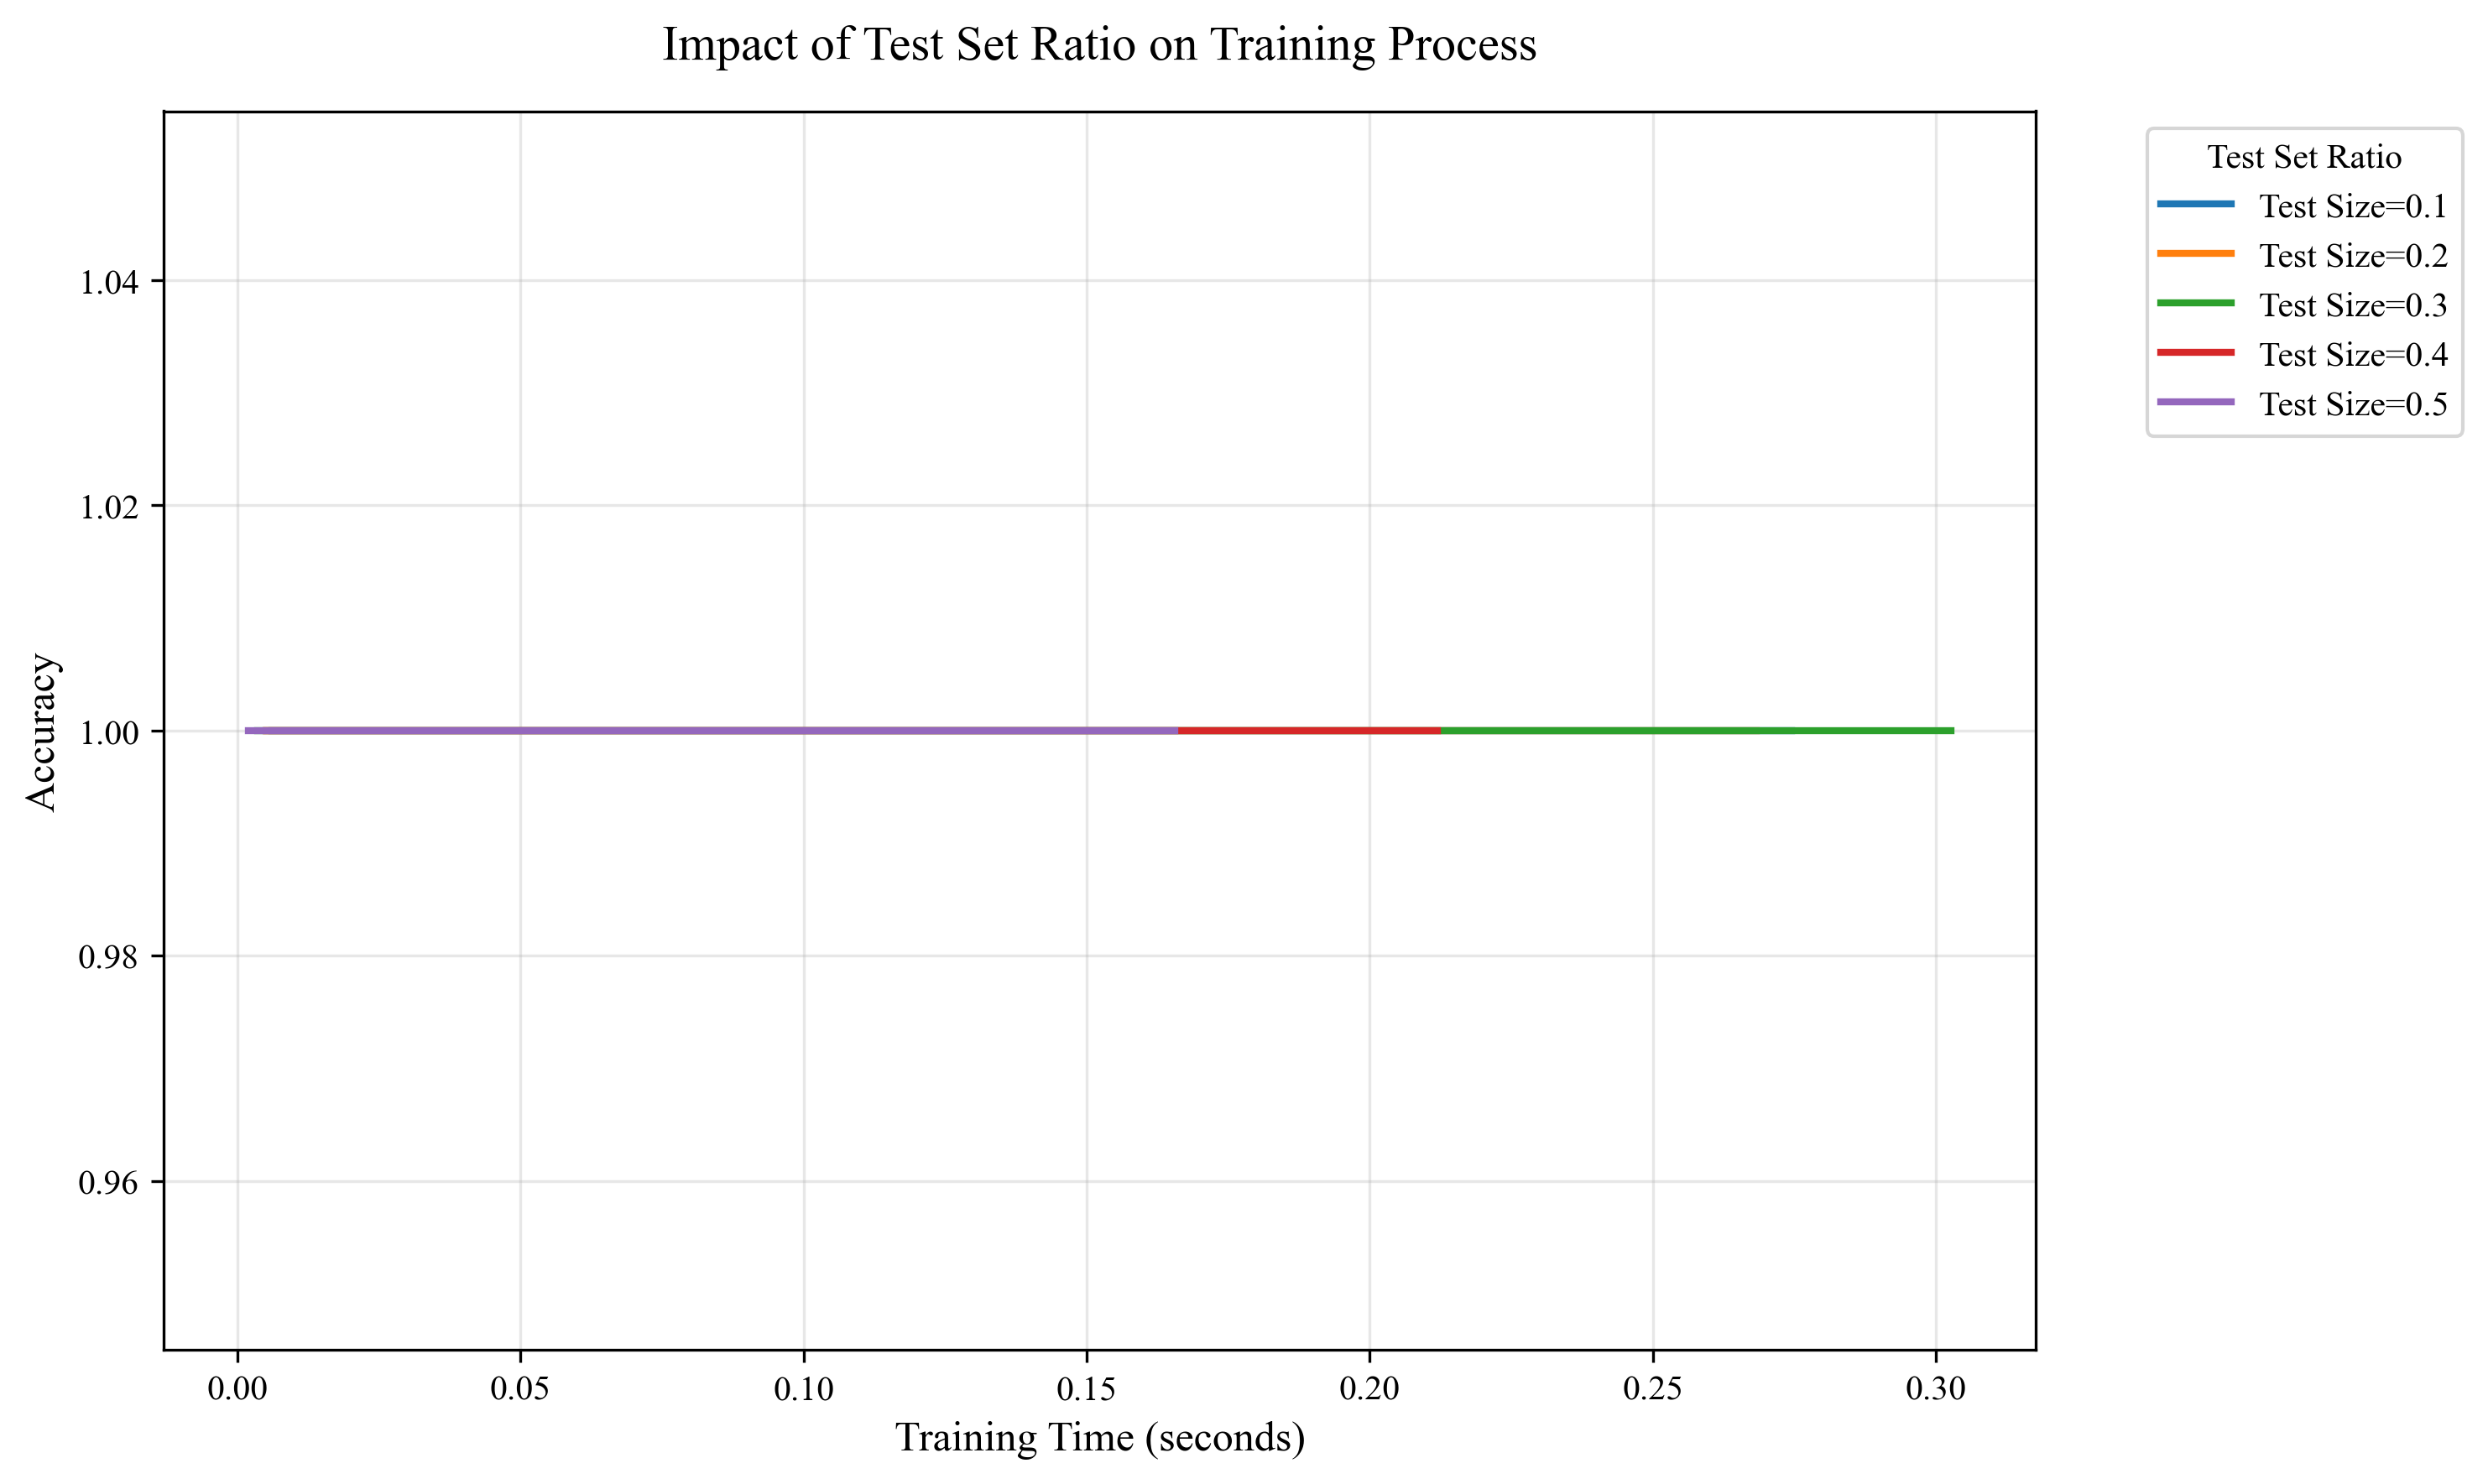

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import time

# 设置绘图样式
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10

# 加载和预处理数据
iris = load_iris()
X = iris.data[iris.target < 2]
y = iris.target[iris.target < 2]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 定义参数
learning_rates = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0]
split_ratios = [0.1, 0.2, 0.3, 0.4, 0.5]
max_iterations = 100

def train_and_record(X, y, C, test_size, max_iter):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=42
    )
    
    model = LogisticRegression(C=C, solver='liblinear', max_iter=1)
    accuracies = []
    times = []
    start_time = time.time()
    
    for i in range(max_iter):
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        current_time = time.time() - start_time
        accuracies.append(accuracy)
        times.append(current_time)
    
    return times, accuracies

# 绘制不同学习率的训练过程
plt.figure(figsize=(10, 6), dpi=300)
test_size = 0.2  # 固定测试集比例

for C in learning_rates:
    times, accuracies = train_and_record(X_scaled, y, C, test_size, max_iterations)
    plt.plot(times, accuracies, '-', label=f'C={C}', linewidth=2)

plt.grid(True, alpha=0.3)
plt.xlabel('Training Time (seconds)', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Impact of Learning Rate on Training Process', fontsize=14, pad=15)
plt.legend(title='Learning Rate', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('e:\\八斗学院深度学习2025\\八斗精品班\\第二周_pytorch逻辑回归\\第二周_pytorch逻辑回归\\资料\\learning_rate_training_process.png',
            dpi=300, bbox_inches='tight')
plt.show()

# 绘制不同数据拆分比例的训练过程
plt.figure(figsize=(10, 6), dpi=300)
C = 1.0  # 固定学习率

for test_size in split_ratios:
    times, accuracies = train_and_record(X_scaled, y, C, test_size, max_iterations)
    plt.plot(times, accuracies, '-', label=f'Test Size={test_size}', linewidth=2)

plt.grid(True, alpha=0.3)
plt.xlabel('Training Time (seconds)', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Impact of Test Set Ratio on Training Process', fontsize=14, pad=15)
plt.legend(title='Test Set Ratio', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('e:\\八斗学院深度学习2025\\八斗精品班\\第二周_pytorch逻辑回归\\第二周_pytorch逻辑回归\\资料\\split_ratio_training_process.png',
            dpi=300, bbox_inches='tight')
plt.show()